# Sports Betting Concepts

This notebook introduces core sports betting concepts with definitions, detailed explanations, and examples for each topic.

## 1. Point Spread

**Definition:**
A spread bet is a type of sports wager where a handicap is applied to the favored team to create a more balanced betting market. The goal is not just to pick the winning team but to predict whether a team will cover the spread.

- The minus sign (-) next to a team indicates the favorite. This team is expected to win the game, but they must win by more than the spread for a bet on them to pay out. The spread number represents how many points the team must win by to cover the spread.

- The plus sign (+) next to a team indicates the underdog. This team is expected to lose the game, but they can either win outright or lose by fewer points than the spread for a bet on them to pay out.

#### Example 1.1: Covering the Spread

In [2]:
home_score = 28
away_score = 21
spread = -6.5
cover_spread = (home_score - away_score) > abs(spread)
print("Example 1.1: Home Team covers the spread:", cover_spread)

Example 1.1: Home Team covers the spread: True


#### Example 1.2: Push (Tie) on the Spread

In [3]:
home_score = 24
away_score = 21
spread = -3
cover_spread = (home_score - away_score) == abs(spread)
print("Example 1.2: Push on the spread:", cover_spread)

Example 1.2: Push on the spread: True


#### Example 1.3: Failing to Cover the Spread

In [4]:
home_score = 28
away_score = 24
spread = -6.5
cover_spread = (home_score - away_score) > abs(spread)
print("Example 1.3: Home Team covers the spread:", cover_spread)

Example 1.3: Home Team covers the spread: False


## 2. Moneyline

A moneyline bet is a simple wager where you bet on which team will win the game outright. There are no point spreads involved—just pick the winner.

*   The minus sign (-) indicates the favorite. The team with negative odds is expected to win. The number tells you how much you need to bet to win 100 dollars.

*   The plus sign (+) indicates the underdog. The team with positive odds is expected to lose. The number tells you how much you would win for betting 100 dollars.

In [1]:
def calculate_payout(moneyline, bet_amount=100):
    if moneyline > 0:
        return (moneyline / 100) * bet_amount
    else:
        return (100 / abs(moneyline)) * bet_amount

#### Example 2.1: Betting on the Favorite

- Home Team has a moneyline of -150.
- If you bet 150 dollars on the Home Team and they win, you will receive a profit of 100 dollars.
- The total payout would be 150 dollars stake + 100 dollars profit = 250 dollars.

In [2]:
payout = calculate_payout(-150, 150)
print(f"Example 2.1: Profit on Home Team winning: ${payout:.2f}")

Example 2.1: Profit on Home Team winning: $100.00


#### Example 2.2: Betting on the Underdog

- Away Team has a moneyline of +200.
- If you bet 100 dollars on the Away Team and they win, you will receive a profit of 200 dollars.
- The total payout would be 100 dollars stake + 200 dollars profit = 300 dollars.


In [3]:
payout = calculate_payout(+200, 100)
print(f"Example 2.2: Profit on Away Team winning: ${payout:.2f}")

Example 2.2: Profit on Away Team winning: $200.00


#### Example 2.3: Losing a Moneyline Bet

- If you place a 200 dollar bet on Home Team at -150 and they lose, you lose your entire 200 dollar bet.
- No money is returned.

In [4]:
home_won = False
bet_amount = 200
payout = calculate_payout(-150, bet_amount) if home_won else -bet_amount
print(f"Example 2.3: Loss on Home Team losing: ${payout:.2f}")

Example 2.3: Loss on Home Team losing: $-200.00


## 3. Total (Over/Under)

**Definition:**
A bet on whether the combined score of both teams will go over or under a set line.

#### Example 3.1: Winning the Over

In [5]:
total_line = 50.5
final_score = 28 + 24
result = "Over wins" if final_score > total_line else "Under wins"
print(f"Example 3.1: {result}")

Example 3.1: Over wins


#### Example 3.2: Winning the Under

In [6]:
total_line = 45.5
final_score = 21 + 17
result = "Over wins" if final_score > total_line else "Under wins"
print(f"Example 3.2: {result}")

Example 3.2: Under wins


#### Example 3.3: Push on the Total

In [7]:
total_line = 48
final_score = 24 + 24
result = "Push" if final_score == total_line else ("Over wins" if final_score > total_line else "Under wins")
print(f"Example 3.3: {result}")

Example 3.3: Push


## 4. Vigorish (Vig)

**Definition:**
The vig is the fee charged by a sportsbook to ensure profit, commonly factored into standard -110 odds.

#### Example 4.1: Break-even Probability

In [8]:
def calculate_vig_break_even(odds):
    return abs(odds) / (abs(odds) + 100)
vig_break_even = calculate_vig_break_even(-110)
print(f"Example 4.1: Break-even win percentage: {vig_break_even:.2%}")

Example 4.1: Break-even win percentage: 52.38%


#### Example 4.2: Vig on a Win

In [10]:
bet_amount = 110
payout = calculate_payout(-110, bet_amount)
profit = payout if True else -bet_amount
print(f"Example 4.2 Profit after winning with vig: ${profit:.2f}")

Example 4.2 Profit after winning with vig: $100.00


#### Example 4.3: Vig on a Large Bet

In [9]:
bet_amount = 10000
break_even_percent = calculate_vig_break_even(-110)
print(f"Example 4.3 Break-even for a $10,000 bet: {break_even_percent:.2%}")

Example 4.3 Break-even for a $10,000 bet: 52.38%


## 5. Odds

Definition: Odds are a numerical representation of the potential payout and the likelihood of an event occurring.

* Purpose: They are used to calculate implied probability and determine how much money you will win on a bet.
* Formats: Odds can be expressed in several ways:
  - Decimal Odds (e.g., 2.50): Common in Europe and Canada.
  - Fractional Odds (e.g., 3/2): Common in the UK and Ireland.
  - Moneyline Odds (e.g., +150, -200): Common in the United States.

#### 5.1 Converting Odds to Moneyline

In [9]:
def odds_to_moneyline(decimal_odds):
    """
    Converts decimal odds to moneyline odds.

    Args:
    decimal_odds (float): The decimal odds to convert.

    Returns:
    float: The equivalent moneyline odds.
    """
    if decimal_odds > 2.0:
        # Underdog (positive moneyline)
        moneyline = (decimal_odds - 1) * 100
    elif decimal_odds > 1.0:
        # Favorite (negative moneyline)
        moneyline = -100 / (decimal_odds - 1)
    else:
        raise ValueError("Decimal Odds must be greater than 1.0")

    return round(moneyline, 2)

In [10]:
# Example 5.1.1: Underdog (Decimal Odds > 2.0)

decimal_odds = 2.5
moneyline = odds_to_moneyline(decimal_odds)
print(f"Decimal Odds {decimal_odds} = Moneyline {moneyline}")


Decimal Odds 2.5 = Moneyline 150.0


In [11]:
# Example 5.1.2: Favorite (Decimal Odds Between 1.0 and 2.0)

decimal_odds = 1.5
moneyline = odds_to_moneyline(decimal_odds)
print(f"Decimal Odds {decimal_odds} = Moneyline {moneyline}")

Decimal Odds 1.5 = Moneyline -200.0


In [12]:
# Example 5.1.3: Invalid Input (Decimal Odds ≤ 1.0)
try:
    decimal_odds = 1.0
    moneyline = odds_to_moneyline(decimal_odds)
except ValueError as e:
    print(e)

Decimal Odds must be greater than 1.0


#### 5.2 Converting Moneyline to Odds

In [13]:
def moneyline_to_odds(moneyline):
    """
    Converts moneyline odds to decimal odds.

    Args:
    moneyline (float): The moneyline odds to convert.

    Returns:
    float: The equivalent decimal odds.
    """
    if moneyline > 0:
        # Underdog (positive moneyline)
        decimal_odds = (moneyline / 100) + 1
    elif moneyline < 0:
        # Favorite (negative moneyline)
        decimal_odds = (100 / abs(moneyline)) + 1
    else:
        raise ValueError("Moneyline odds cannot be zero")

    return round(decimal_odds, 2)


In [15]:
# Example 5.2.1: Underdog (Positive Moneyline)

moneyline = 200
decimal_odds = moneyline_to_odds(moneyline)
print(f"Moneyline {moneyline} = Decimal odds {decimal_odds}")

Moneyline 200 = Decimal odds 3.0


In [16]:
# Example 5.2.2: Favorite (Negative Moneyline)

moneyline = -150
decimal_odds = moneyline_to_odds(moneyline)
print(f"Moneyline {moneyline} = Decimal odds {decimal_odds}")

Moneyline -150 = Decimal odds 1.67


In [17]:
# Example 5.2.3: Invalid Input (Moneyline = 0)
try:
    moneyline = 0
    decimal_odds = moneyline_to_odds(moneyline)
except ValueError as e:
    print(e)

Moneyline odds cannot be zero


## 6. Probability of Win

The probability of a win in sports betting represents the likelihood (as a percentage or decimal) that a specific team or outcome will occur. It is derived from betting odds provided by sportsbooks, which consider factors like team strength, injuries, public betting behavior, and statistical analysis.

#### How It Is Used in Betting

- Assessing Risk:
Bettors use winning probability to assess the likelihood of a bet succeeding and to compare it with their personal estimation of the outcome.

- Identifying Value:
A bet is considered to have positive expected value (EV) when the bettor believes the true winning probability is higher than the implied probability suggested by the odds.

- Sportsbook Adjustments:
Sportsbooks include their profit margin (vig) in the odds, meaning the implied probabilities for all outcomes of an event will sum to slightly more than 100%.

#### 6.1 Converting Moneyline to Probability

In [18]:
def get_prob_win(ml):
    """
    Converts moneyline odds to winning probability.

    Args:
    ml (float): The moneyline odds.

    Returns:
    float: The equivalent winning probability (between 0 and 1).
    """
    if ml > 0:
        # Underdog (positive moneyline)
        prob = 1.0 - (ml / (ml + 100.0))
    elif ml < 0:
        # Favorite (negative moneyline)
        prob = abs(ml) / (abs(ml) + 100.0)
    else:
        # Edge case: Moneyline is zero
        prob = 0.5
    return round(prob, 4)

In [20]:
# Example 6.1.1: Winning Probability for an Underdog
ml = 200
prob = get_prob_win(ml)
print(f"Moneyline {ml} = Winning Probability {prob:.2%}")

Moneyline 200 = Winning Probability 33.33%


In [21]:
# Example 6.1.2: Winning Probability for a Favorite
ml = -150
prob = get_prob_win(ml)
print(f"Moneyline {ml} = Winning Probability {prob:.2%}")

Moneyline -150 = Winning Probability 60.00%


In [22]:
# Example 6.1.3: Winning Probability for an Even Match
ml = 0
prob = get_prob_win(ml)
print(f"Moneyline {ml} = Winning Probability {prob:.2%}")

Moneyline 0 = Winning Probability 50.00%


#### 6.2 Converting Probability to Moneyline

In [23]:
def get_moneyline_from_prob(prob):
    """
    Converts winning probability to moneyline odds.

    Args:
    prob (float): The winning probability (between 0 and 1).

    Returns:
    float: The equivalent moneyline odds.
    """
    if prob <= 0 or prob >= 1:
        raise ValueError("Probability must be between 0 and 1 (exclusive).")

    if prob > 0.5:
        # Favorite (negative moneyline)
        moneyline = -100 * (prob / (1 - prob))
    else:
        # Underdog (positive moneyline)
        moneyline = 100 * ((1 - prob) / prob)

    return round(moneyline, 2)

In [24]:
# Example 6.2.1: Probability for a Favorite (60%)
prob = 0.6
moneyline = get_moneyline_from_prob(prob)
print(f"Probability {prob:.2%} = Moneyline {moneyline}")

Probability 60.00% = Moneyline -150.0


In [25]:
# Example 6.2.2: Probability for an Underdog (40%)
prob = 0.4
moneyline = get_moneyline_from_prob(prob)
print(f"Probability {prob:.2%} = Moneyline {moneyline}")

Probability 40.00% = Moneyline 150.0


In [26]:
# Example 6.2.3: Invalid Probability (100%)
try:
    prob = 1.0
    moneyline = get_moneyline_from_prob(prob)
except ValueError as e:
    print(e)

Probability must be between 0 and 1 (exclusive).


## 7. Expected Value (EV)

**Expected Value (EV)** is a critical concept in sports betting that measures the potential profit or loss a bettor can expect to earn over the long term from a specific bet. It is calculated by considering both the probability of an outcome occurring and the payout associated with that outcome. The formula for EV is simple: multiply the probability of winning by the profit from a successful bet, subtract the probability of losing multiplied by the amount wagered. A positive EV (+EV) indicates that the bet is expected to be profitable over the long run, while the negative EV(-EV) suggests the bet will likely result in a loss over time.

Understanding EV helps bettors make informed decisions by focusing on value rather than emotions or short-term results. For example, even if a team is favored to win, the odds offered by a sportsbook might not provide a fair return compared to the implied probability. By comparing the implied probability from the odds to the bettor’s own assessment of the true probability, EV reveals whether a bet is worth placing. While no single bet guarantees success, consistently wagering on bets with positive EV increases the likelihood of long-term profitability. This makes EV a powerful tool for serious bettors who aim to approach sports betting with a disciplined and strategic mindset.

#### Example 7.1: Positive EV Bet

In [27]:
def calculate_expected_value(moneyline, win_probability, bet_amount=100):
    odds = (moneyline / 100) + 1 if moneyline > 0 else (100 / abs(moneyline)) + 1
    profit = (odds - 1) * bet_amount
    return (win_probability * profit) - ((1 - win_probability) * bet_amount)

In [13]:
ev = calculate_expected_value(+200, 0.60)
print(f"Example 7.1: Positive EV: ${ev:.2f}")

Example 7.1: Positive EV: $80.00


#### Example 7.2: Negative EV Bet

In [28]:
ev = calculate_expected_value(-150, 0.40)
print(f"Example 7.2: Negative EV: ${ev:.2f}")

Example 7.2: Negative EV: $-33.33


#### Example 7.3: Zero EV Bet

In [29]:
ev = calculate_expected_value(-110, 0.5238)
print(f"Example 7.3: Zero EV (Break-even): ${ev:.2f}")

Example 7.3: Zero EV (Break-even): $-0.00


## 8. Kelly Formula

The Kelly Formula (also known as Kelly Criterion) is a method for determining the optimal size of a series of bets to maximize the long-term growth of your capital. It tells you what fraction of your bankroll to bet when you have an edge, meaning that the expected return is positive. Essentially, the formula calculates the fraction to wager as (b * p - (1 - p)) divided by b, where p is the probability of winning, (1 - p) is the probability of losing, and b represents the net profit you would receive on a successful bet for each unit wagered. If the result is positive, it indicates a favorable bet; if it is zero or negative, it suggests that you do not have a sufficient edge to justify the wager.

This criterion is popular among both gamblers and investors because it not only seeks to maximize the growth rate of your capital but also manages risk by preventing you from betting too large a portion of your funds on any single wager. By carefully adjusting the amount wagered based on your edge, the Kelly Formula ensures that you avoid risking your entire bankroll during losing streaks while still taking advantage of opportunities to grow your wealth. However, its effectiveness depends on accurately estimating the probability of winning and the payout odds, so many users choose to bet only a fraction of the recommended amount to mitigate potential estimation errors or volatility in outcomes.

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def kelly_fraction(p, b):
    """
    Calculate the Kelly fraction.

    Parameters:
    - p: float or np.array, probability of winning
    - b: float, net odds received on a win (i.e., profit b dollars per $1 bet)

    Returns:
    - The Kelly fraction (or fractions if p is an array)
    """
    q = 1 - p
    fraction = (b * p - q) / b
    return fraction

In [36]:
# --- Example 8.1: Even-Money Bet (Coin Toss) ---
# Parameters:
#   p = 0.55 (55% chance of winning)
#   b = 1 (even-money bet: you win $1 for every $1 bet)
p1, b1 = 0.55, 1
kelly1 = kelly_fraction(p1, b1)
print("Example 8.1: Even-Money Bet (Coin Toss)")
print(f"Probability of Winning (p): {p1}")
print(f"Odds (b): {b1}")
print(f"Kelly Fraction: {kelly1:.3f} (i.e., bet {kelly1*100:.1f}% of your bankroll)\n")

Example 8.1: Even-Money Bet (Coin Toss)
Probability of Winning (p): 0.55
Odds (b): 1
Kelly Fraction: 0.100 (i.e., bet 10.0% of your bankroll)



In [37]:
# --- Example 8.2: Higher Odds Bet ---
# Parameters:
#   p = 0.30 (30% chance of winning)
#   b = 4 (if you bet $1, you profit $4 if you win)
p2, b2 = 0.30, 4
kelly2 = kelly_fraction(p2, b2)
print("Example 8.2: Higher Odds Bet")
print(f"Probability of Winning (p): {p2}")
print(f"Odds (b): {b2}")
print(f"Kelly Fraction: {kelly2:.3f} (i.e., bet {kelly2*100:.1f}% of your bankroll)\n")

Example 8.2: Higher Odds Bet
Probability of Winning (p): 0.3
Odds (b): 4
Kelly Fraction: 0.125 (i.e., bet 12.5% of your bankroll)



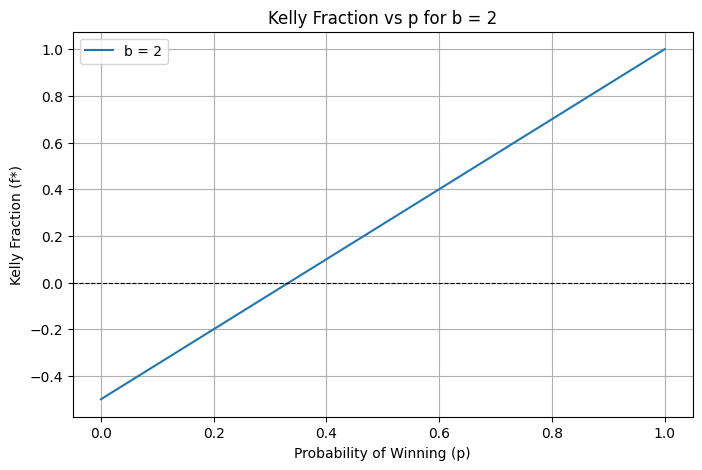

In [38]:
# --- Plot Kelly Fraction as a Function of p for a given b ---
# For example, let's consider b = 2 and vary p from 0 to 1.
b_val = 2
p_values = np.linspace(0.0, 1.0, 1000)
kelly_values = kelly_fraction(p_values, b_val)

plt.figure(figsize=(8, 5))
plt.plot(p_values, kelly_values, label=f"b = {b_val}")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Probability of Winning (p)")
plt.ylabel("Kelly Fraction (f*)")
plt.title(f"Kelly Fraction vs p for b = {b_val}")
plt.legend()
plt.grid(True)
plt.show()